## Importing Modules

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Defining colourChange(img) function

In [2]:
def colourChange(img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    return img_gray, img_rgb

## Loading image

In [3]:
img_bgr = cv2.imread('./samples/images/theIncredibles2.png')
img_gray, img_rgb = colourChange(img_bgr)

## Adjusting parameters

In [4]:
plt.rcParams['figure.figsize'] = (20, 20)

## Displaying image

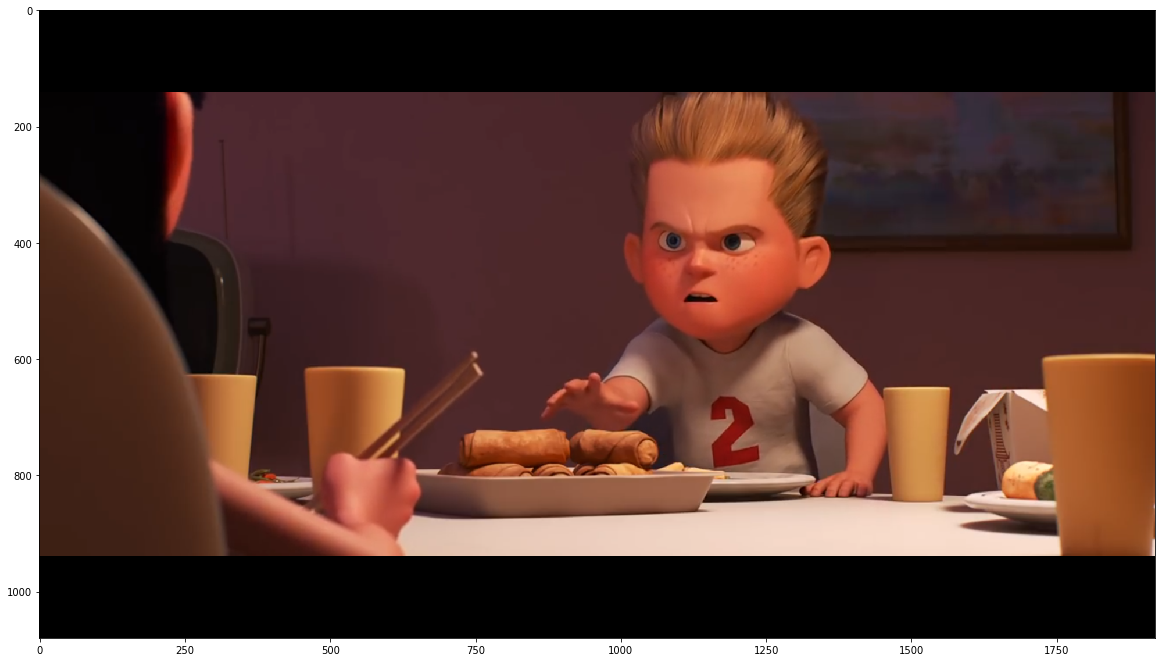

In [5]:
plt.imshow(img_rgb)

## Initializing HaarCascades

In [6]:
face_cascade = cv2.CascadeClassifier('./cascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./cascades/haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('./cascades/haarcascade_smile.xml')

## Image-Box holding every image

In [7]:
img_box = [img_gray, img_bgr, img_rgb]

## Defining faceEyeDetection(img_box) function for detection of face, eyes and smile

In [8]:
def faceEyeDetection(img_box):
    faces = face_cascade.detectMultiScale(img_box[0], 1.05, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img_box[1], (x, y), ((x + w), (y + h)), (0, 255, 0), 2)
        roi_gray = img_box[0][y:y+h, x:x+w]
        roi_bgr = img_box[1][y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.05, 6)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_bgr, (ex, ey), ((ex + ew), (ey + eh)), (255, 0, 0), 2)
            
        smiles = smile_cascade.detectMultiScale(roi_gray, 1.05, 12)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_bgr, (sx, sy), ((sx + sw), (sy + sh)), (0, 0, 255), 2)
            
    cv2.imshow('img', img_box[1])
    cv2.waitKey(2000)
    cv2.destroyAllWindows()

## Calling applyChangesAndSaveImage() function

In [9]:
def applyChangesAndSaveImage(img_box):
    
#   calling faceEyeDetection() function
    faceEyeDetection(img_box)

#   saving file
    cv2.imwrite('./samples/images/processedImage.jpg', img_box[1])

## Calling applyChangesAndSaveImage() function

In [10]:
applyChangesAndSaveImage(img_box)

## Image Loading and Displaying

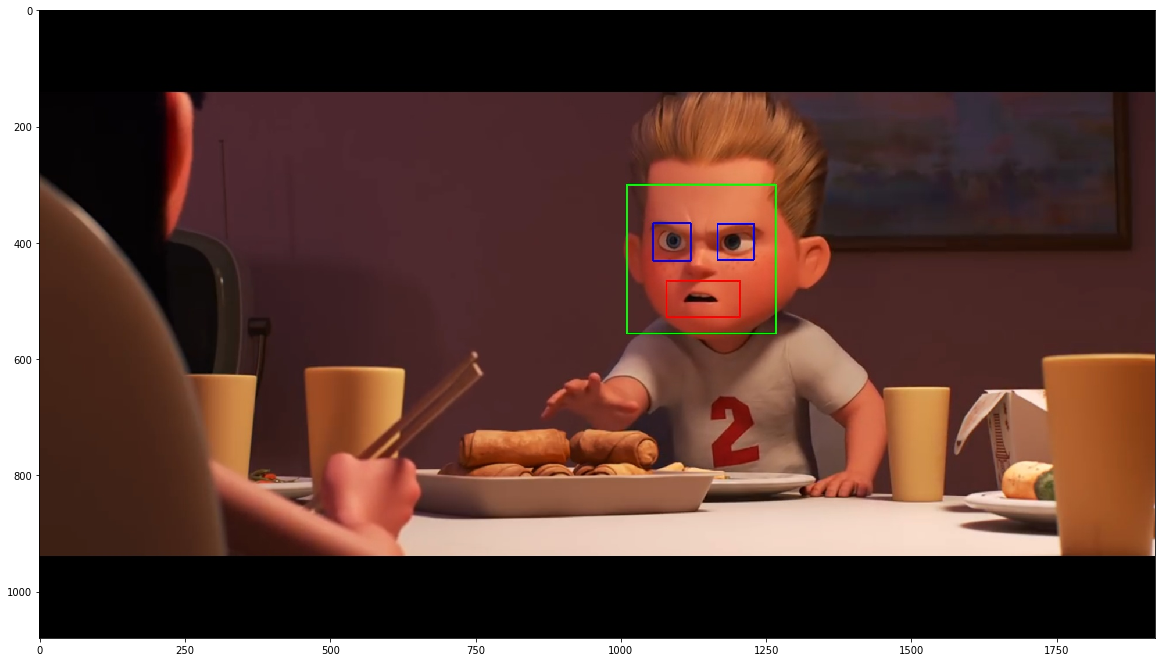

In [11]:
# image loading
img_bgr = cv2.imread('./samples/images/processedImage.jpg')

# converting colur BGR to RGB
_, img_rgb = colourChange(img_bgr)

# displaying image
plt.imshow(img_rgb)